## Notebook Description
This notebook is dedicated to Feature Engineering and EDA on the clean data read in from the `clean_data` folder. It will look at the data in one dataframe, then split the data into two dataframes (one for each Subreddit), to look at the data independently. It will also look at the Feature Engineered columns to exploit patterns amongst the data.

In [75]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [76]:
df = pd.read_csv('../clean_data/reddit_clean.csv')
df.head()

,title,selftext,subreddit,created_utc
0,"Where to backpack 4 nights in Utah, Arizona, o...",Hello Reddit folks! Four of my friends and I a...,backpacking,1646011972
1,"Peace Walls, Belfast",NaN,backpacking,1646007041
2,How To Mount Snowshoes On Osprey Talon 22 Back...,"The backpack is fairly small, but the suspensi...",backpacking,1646005307
3,Bringing dog to Kearsarge pass?,[removed],backpacking,1646004876
4,Mid 30s short trip to Thailand - Bangkok &amp;...,My husband and I plan to go to Thailand for a ...,backpacking,1646000495


In [77]:
df.isnull().sum()

title             0
selftext       1431
subreddit         0
created_utc       0
dtype: int64

In [78]:
df['selftext'] = df['selftext'].fillna('')
df.isnull().sum()

title          0
selftext       0
subreddit      0
created_utc    0
dtype: int64

#### Baseline Model

In [79]:
# Baseline model
# Need my model to be better than .50

df['subreddit'].value_counts(normalize=True)

ultrarunning    0.500125
backpacking     0.499875
Name: subreddit, dtype: float64

# Feature Engineering

## Merging Title and Selftext columns

In [80]:
df['title_merge'] = df['title'] + ' ' + df['selftext']
df.drop(columns=['title','selftext'], inplace=True)
df.head()

,subreddit,created_utc,title_merge
0,backpacking,1646011972,"Where to backpack 4 nights in Utah, Arizona, o..."
1,backpacking,1646007041,"Peace Walls, Belfast"
2,backpacking,1646005307,How To Mount Snowshoes On Osprey Talon 22 Back...
3,backpacking,1646004876,Bringing dog to Kearsarge pass? [removed]
4,backpacking,1646000495,Mid 30s short trip to Thailand - Bangkok &amp;...


## Feature Engineering & Sentiment Scores

In [81]:
# Sentiment Scores
sia = SentimentIntensityAnalyzer()

df['title_sentiment'] = df['title_merge'].apply(sia.polarity_scores)
df['title_sentiment_neg'] = df['title_sentiment'].map(lambda x: x['neg'])
df['title_sentiment_neu'] = df['title_sentiment'].map(lambda x: x['neu'])
df['title_sentiment_pos'] = df['title_sentiment'].map(lambda x: x['pos'])
df['title_sentiment_compound'] = df['title_sentiment'].map(lambda x: x['compound'])

In [82]:
# Counting Capitals in string
def count_capitals(row):
    count = 0 
    for i in row:
        if i.isupper():
            count += 1
    return count

In [83]:
# Counting sentences in a string
def words_in_sentence(row):
    return len((re.split(r'[.!?]+', row))) - 1

In [84]:
# Feature Engineering based on Title characteristics

df['title_length'] = df['title_merge'].str.len()
df['title_word_count'] = [len(title.split(' ')) for title in df['title_merge']]
df['capitalized_letters_in_title'] = df['title_merge'].map(count_capitals)
df['sentences_in_title'] = df['title_merge'].map(words_in_sentence)
df.head()

,subreddit,created_utc,title_merge,title_sentiment,title_sentiment_neg,title_sentiment_neu,title_sentiment_pos,title_sentiment_compound,title_length,title_word_count,capitalized_letters_in_title,sentences_in_title
0,backpacking,1646011972,"Where to backpack 4 nights in Utah, Arizona, o...","{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.000,0.804,0.196,0.9127,315,60,16,4
1,backpacking,1646007041,"Peace Walls, Belfast","{'neg': 0.0, 'neu': 0.364, 'pos': 0.636, 'comp...",0.000,0.364,0.636,0.5423,21,4,3,0
2,backpacking,1646005307,How To Mount Snowshoes On Osprey Talon 22 Back...,"{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compou...",0.000,0.760,0.240,0.9282,247,45,11,5
3,backpacking,1646004876,Bringing dog to Kearsarge pass? [removed],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,41,6,2,1
4,backpacking,1646000495,Mid 30s short trip to Thailand - Bangkok &amp;...,"{'neg': 0.024, 'neu': 0.787, 'pos': 0.189, 'co...",0.024,0.787,0.189,0.9786,839,162,32,11


In [85]:
# Drop title_sentiment column because it's a dictionary and I have the columns on their own 
df.drop(columns='title_sentiment', inplace=True)
df.head()

,subreddit,created_utc,title_merge,title_sentiment_neg,title_sentiment_neu,title_sentiment_pos,title_sentiment_compound,title_length,title_word_count,capitalized_letters_in_title,sentences_in_title
0,backpacking,1646011972,"Where to backpack 4 nights in Utah, Arizona, o...",0.000,0.804,0.196,0.9127,315,60,16,4
1,backpacking,1646007041,"Peace Walls, Belfast",0.000,0.364,0.636,0.5423,21,4,3,0
2,backpacking,1646005307,How To Mount Snowshoes On Osprey Talon 22 Back...,0.000,0.760,0.240,0.9282,247,45,11,5
3,backpacking,1646004876,Bringing dog to Kearsarge pass? [removed],0.000,1.000,0.000,0.0000,41,6,2,1
4,backpacking,1646000495,Mid 30s short trip to Thailand - Bangkok &amp;...,0.024,0.787,0.189,0.9786,839,162,32,11


#### Exporting data with Title and Selftext merged to `engineered_data` folder

In [86]:
# Write engineered data to CSV to be used in modeling
df.to_csv('../engineered_data/engineered_data_merged_columns.csv', index=False)
"----" * 36

'------------------------------------------------------------------------------------------------------------------------------------------------'

### Splitting Dataframe into Two Dataframes: Backpacking & Ultrarunning

In [87]:
df_backpacking = df[df['subreddit'] == 'backpacking']
df_backpacking.head()

,subreddit,created_utc,title_merge,title_sentiment_neg,title_sentiment_neu,title_sentiment_pos,title_sentiment_compound,title_length,title_word_count,capitalized_letters_in_title,sentences_in_title
0,backpacking,1646011972,"Where to backpack 4 nights in Utah, Arizona, o...",0.000,0.804,0.196,0.9127,315,60,16,4
1,backpacking,1646007041,"Peace Walls, Belfast",0.000,0.364,0.636,0.5423,21,4,3,0
2,backpacking,1646005307,How To Mount Snowshoes On Osprey Talon 22 Back...,0.000,0.760,0.240,0.9282,247,45,11,5
3,backpacking,1646004876,Bringing dog to Kearsarge pass? [removed],0.000,1.000,0.000,0.0000,41,6,2,1
4,backpacking,1646000495,Mid 30s short trip to Thailand - Bangkok &amp;...,0.024,0.787,0.189,0.9786,839,162,32,11


In [88]:
df_ultrarunning = df[df['subreddit'] == 'ultrarunning']
df_ultrarunning.head()

,subreddit,created_utc,title_merge,title_sentiment_neg,title_sentiment_neu,title_sentiment_pos,title_sentiment_compound,title_length,title_word_count,capitalized_letters_in_title,sentences_in_title
1999,ultrarunning,1645998486,Hamstring? IT Band? Anyone have any idea what'...,0.060,0.833,0.107,0.9419,1434,269,43,20
2000,ultrarunning,1645974508,Kodiak 100 Big Bear Has anyone else signed up ...,0.000,0.788,0.212,0.8655,210,40,14,4
2001,ultrarunning,1645967199,What's your recovery food/supplementation for ...,0.054,0.819,0.128,0.9105,780,142,12,7
2002,ultrarunning,1645949692,What's your best advice for bullet-proof quads...,0.133,0.725,0.143,0.2858,511,94,7,7
2003,ultrarunning,1645904750,1955 Ultra finisher awards \n\nhttps://previe...,0.000,0.734,0.266,0.9685,717,68,30,11


### EDA on Newly Engineered Dataframe (prior to CountVectorize)

In [89]:
df.head()

,subreddit,created_utc,title_merge,title_sentiment_neg,title_sentiment_neu,title_sentiment_pos,title_sentiment_compound,title_length,title_word_count,capitalized_letters_in_title,sentences_in_title
0,backpacking,1646011972,"Where to backpack 4 nights in Utah, Arizona, o...",0.000,0.804,0.196,0.9127,315,60,16,4
1,backpacking,1646007041,"Peace Walls, Belfast",0.000,0.364,0.636,0.5423,21,4,3,0
2,backpacking,1646005307,How To Mount Snowshoes On Osprey Talon 22 Back...,0.000,0.760,0.240,0.9282,247,45,11,5
3,backpacking,1646004876,Bringing dog to Kearsarge pass? [removed],0.000,1.000,0.000,0.0000,41,6,2,1
4,backpacking,1646000495,Mid 30s short trip to Thailand - Bangkok &amp;...,0.024,0.787,0.189,0.9786,839,162,32,11


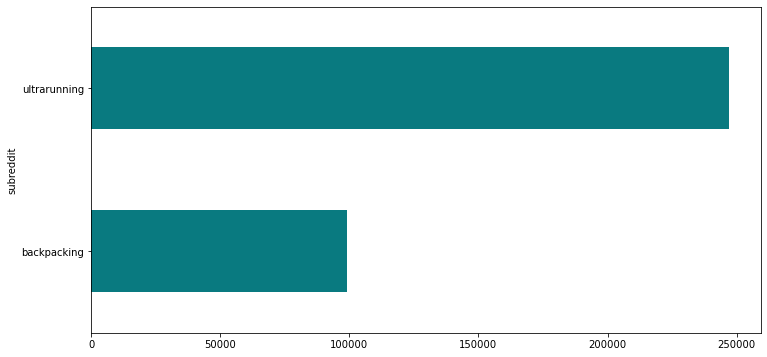

In [90]:
df.groupby('subreddit').sum()['title_word_count'].sort_values(ascending=True).plot.barh(figsize=(12,6), color = '#097a80');

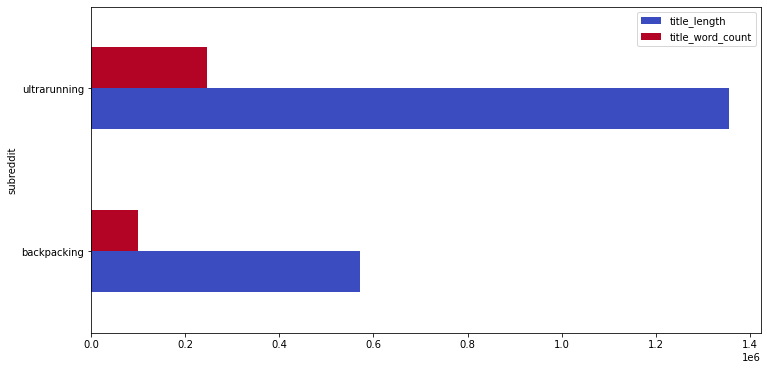

In [91]:
df.groupby(['subreddit']).sum()[['title_length','title_word_count']].plot.barh(cmap='coolwarm', figsize=(12,6));

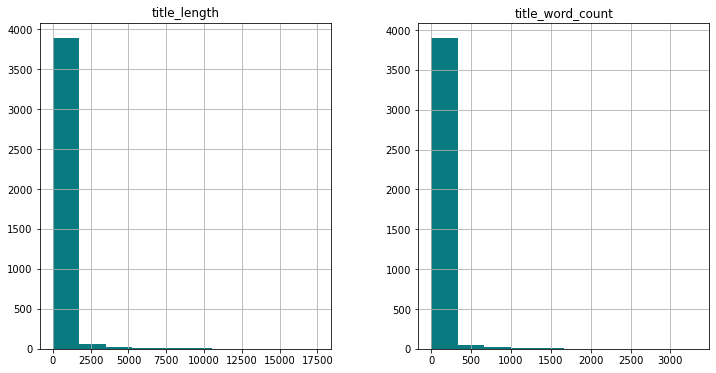

In [92]:
df[['title_length', 'title_word_count']].hist(figsize=(12,6), color = '#097a80');

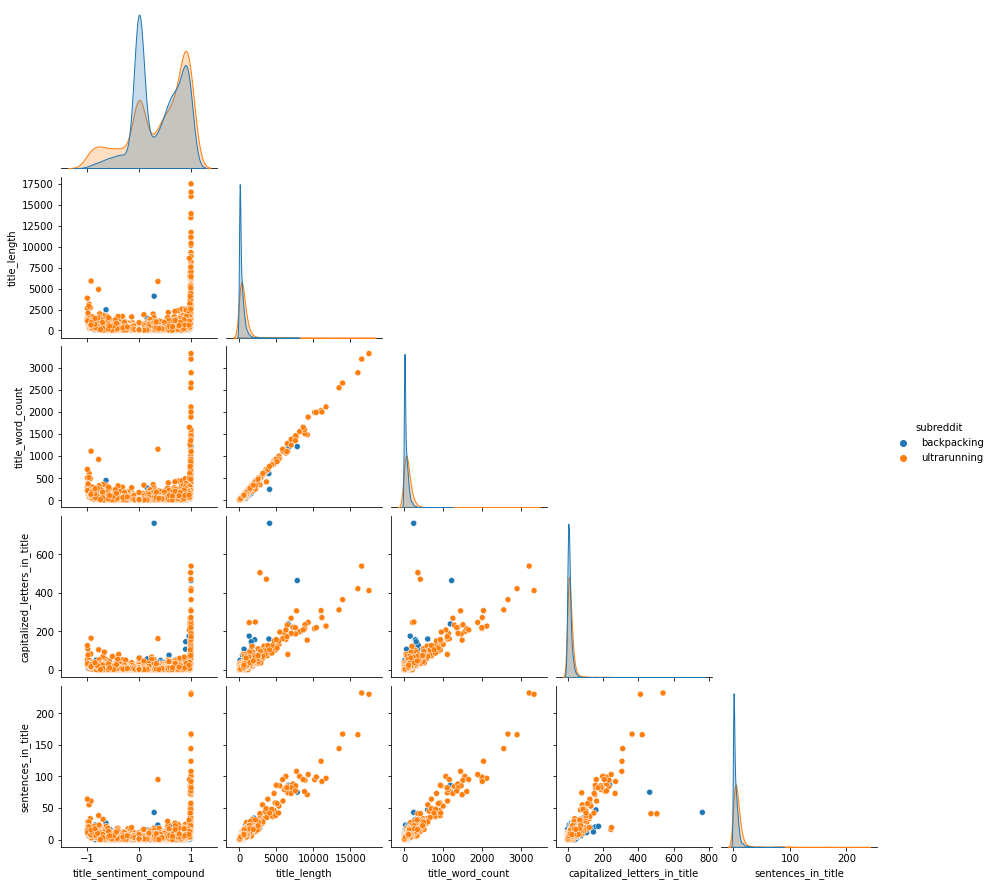

In [93]:
sns.pairplot(df, x_vars=['title_sentiment_compound','title_length', 'title_word_count',
                         'capitalized_letters_in_title', 'sentences_in_title'],
                 y_vars=['title_sentiment_compound','title_length', 'title_word_count',
                         'capitalized_letters_in_title', 'sentences_in_title'],
                         hue='subreddit',
                         corner=True);

### Set up for CountVectorizer

In [94]:
# Set up for CountVectorizer

X = df['title_merge']
y = df['subreddit']

In [95]:
# Test/Train/Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [96]:
# Instantiate a CountVectorizer with the default hyperparamters
cvec = CountVectorizer(stop_words='english')

In [97]:
# Fit the vectorizer on my corpus
cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [98]:
# Transform the corpus
X_train = cvec.transform(X_train)

# Transform test
X_test = cvec.transform(X_test)

In [99]:
# View some of the feature_names

cvec.get_feature_names()[1000:1010]

['6089305451',
 '60fps',
 '60ish',
 '60k',
 '60km',
 '60l',
 '60m',
 '60miles',
 '60mpw',
 '60s']

In [100]:
X_train_df = pd.DataFrame(X_train.todense(),
                         columns=cvec.get_feature_names())

## EDA on CountVectorized Title

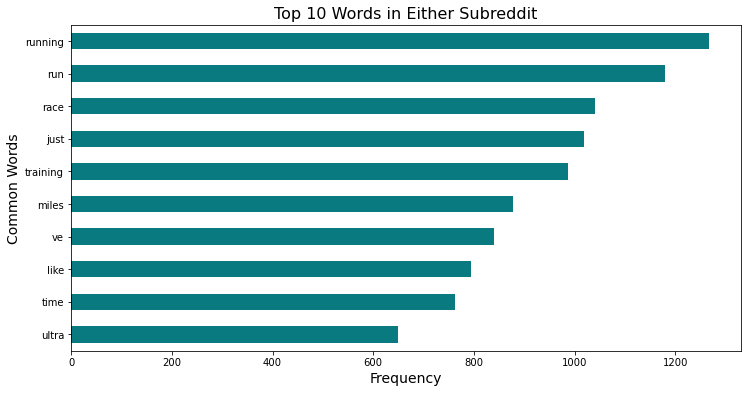

In [101]:
# Top 20 occurring words in either subreddits - using both Title & Selftext columns merged. 
# Models were based on this method; use this for visuals!

X_train_df.sum(numeric_only=True).sort_values(ascending=True).tail(10).plot.barh(figsize=(12,6), color = '#097a80')
plt.xlabel('Frequency', fontdict= {'fontsize':14})
plt.ylabel('Common Words', fontdict= {'fontsize':14})
plt.title('Top 10 Words in Either Subreddit', fontdict = {'fontsize':16})
plt.savefig("../graphics/Top_10_words_either_subreddit_title_and_selftext.jpg", bbox_inches="tight", dpi=100); #save as jpg

### Sentiment Distribution
Since I performed Sentiment Analysis by Subreddit, I wanted to see how they compared to each other. It looks like the Ultrarunning subreddit is a bit more positive than Backpacking... which is largely neutral

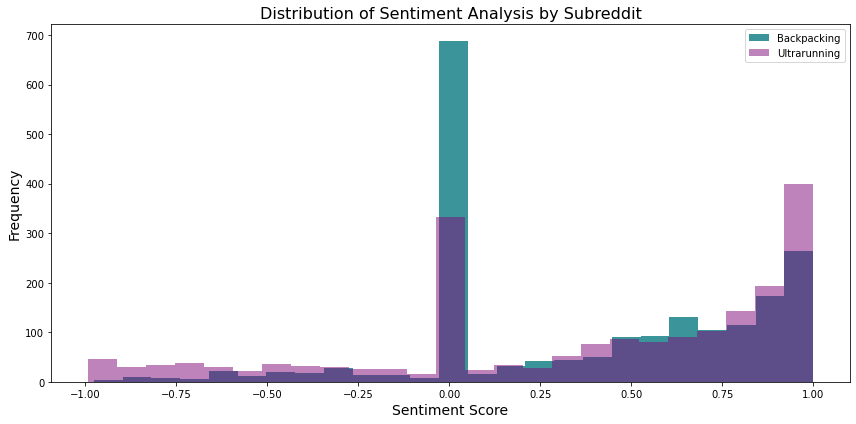

In [102]:
plt.figure(figsize=(12,6))
plt.hist(df_backpacking['title_sentiment_compound'], color ='#097a80', label='Backpacking', alpha = 0.8, bins=25)
plt.hist(df_ultrarunning['title_sentiment_compound'], color = '#80097a', label='Ultrarunning', alpha = 0.5, bins=25)
plt.xlabel('Sentiment Score', fontdict= {'fontsize':14})
plt.ylabel('Frequency', fontdict= {'fontsize':14})
plt.title('Distribution of Sentiment Analysis by Subreddit', fontdict = {'fontsize':16})
plt.legend()
plt.tight_layout()
plt.savefig("../graphics/sentinment_distribution.jpg", bbox_inches="tight", dpi=100); #save as jpg;